# Dataset Sampling

The aim of this notebook is to provide information about features sampling in order to determine which response features are more suitable for the project.

## Feature Sampling

Which of the features are well sampled (e.g., is it feasible that the samples of *response features* represent random sampling of probability densities? If not, which ones are? How are the input features sampled? Is there sufficient variation to support statistical modeling?, etc.).

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_style = {"grid.color": "black", "grid.linestyle": ":", "grid.linewidth": 0.3, "axes.edgecolor": "black", "ytick.left": True, "xtick.bottom": True}
sns.set_context("notebook")
sns.set_theme(style="whitegrid", rc=custom_style)

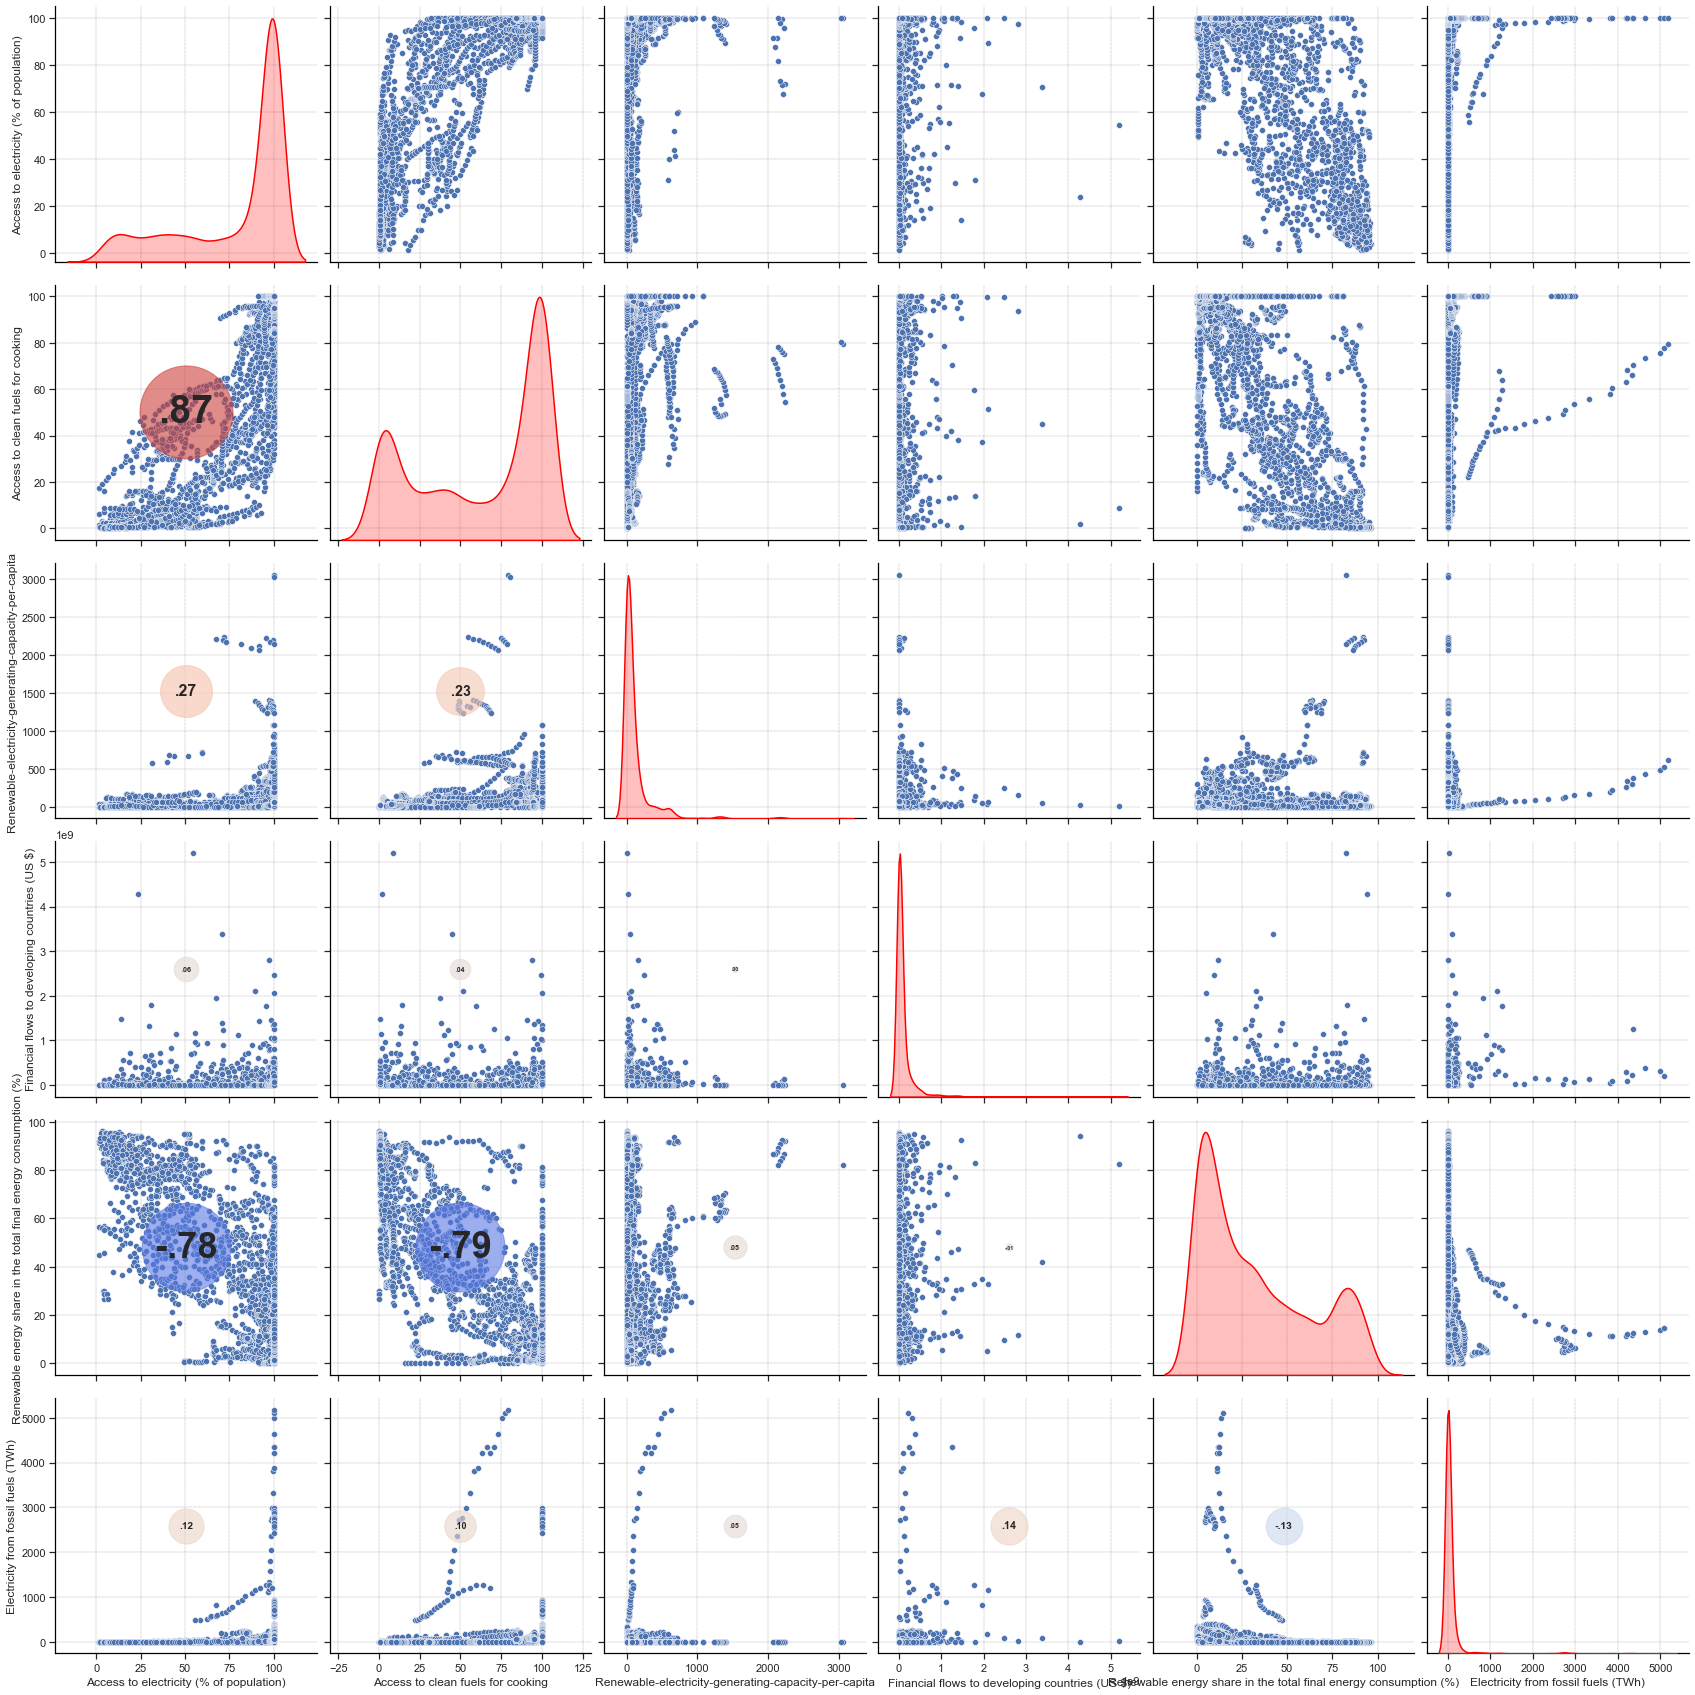

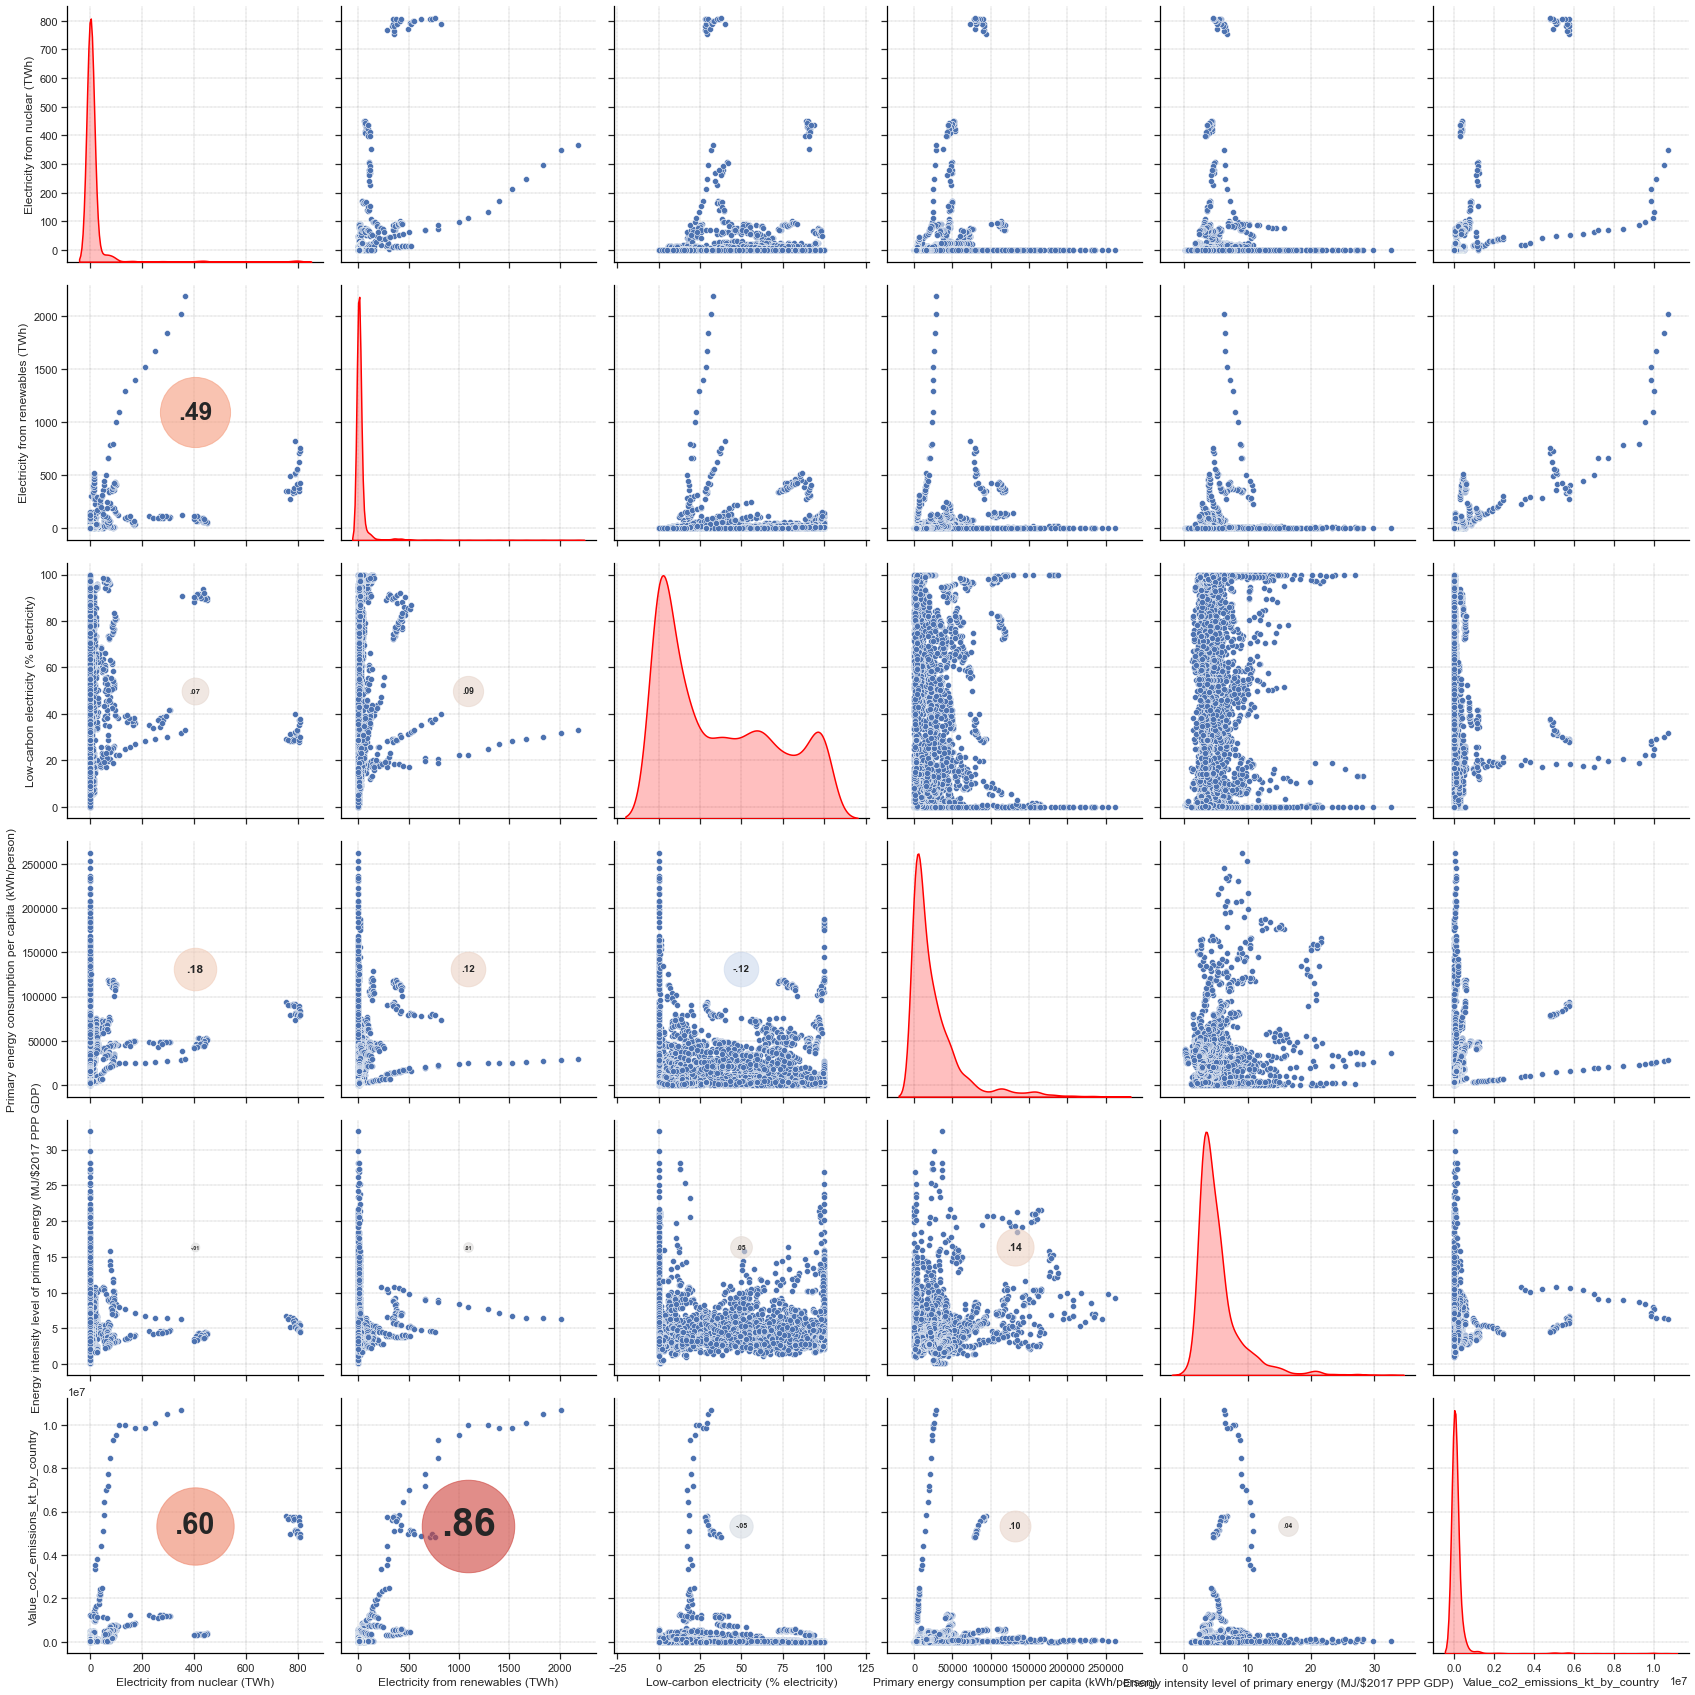

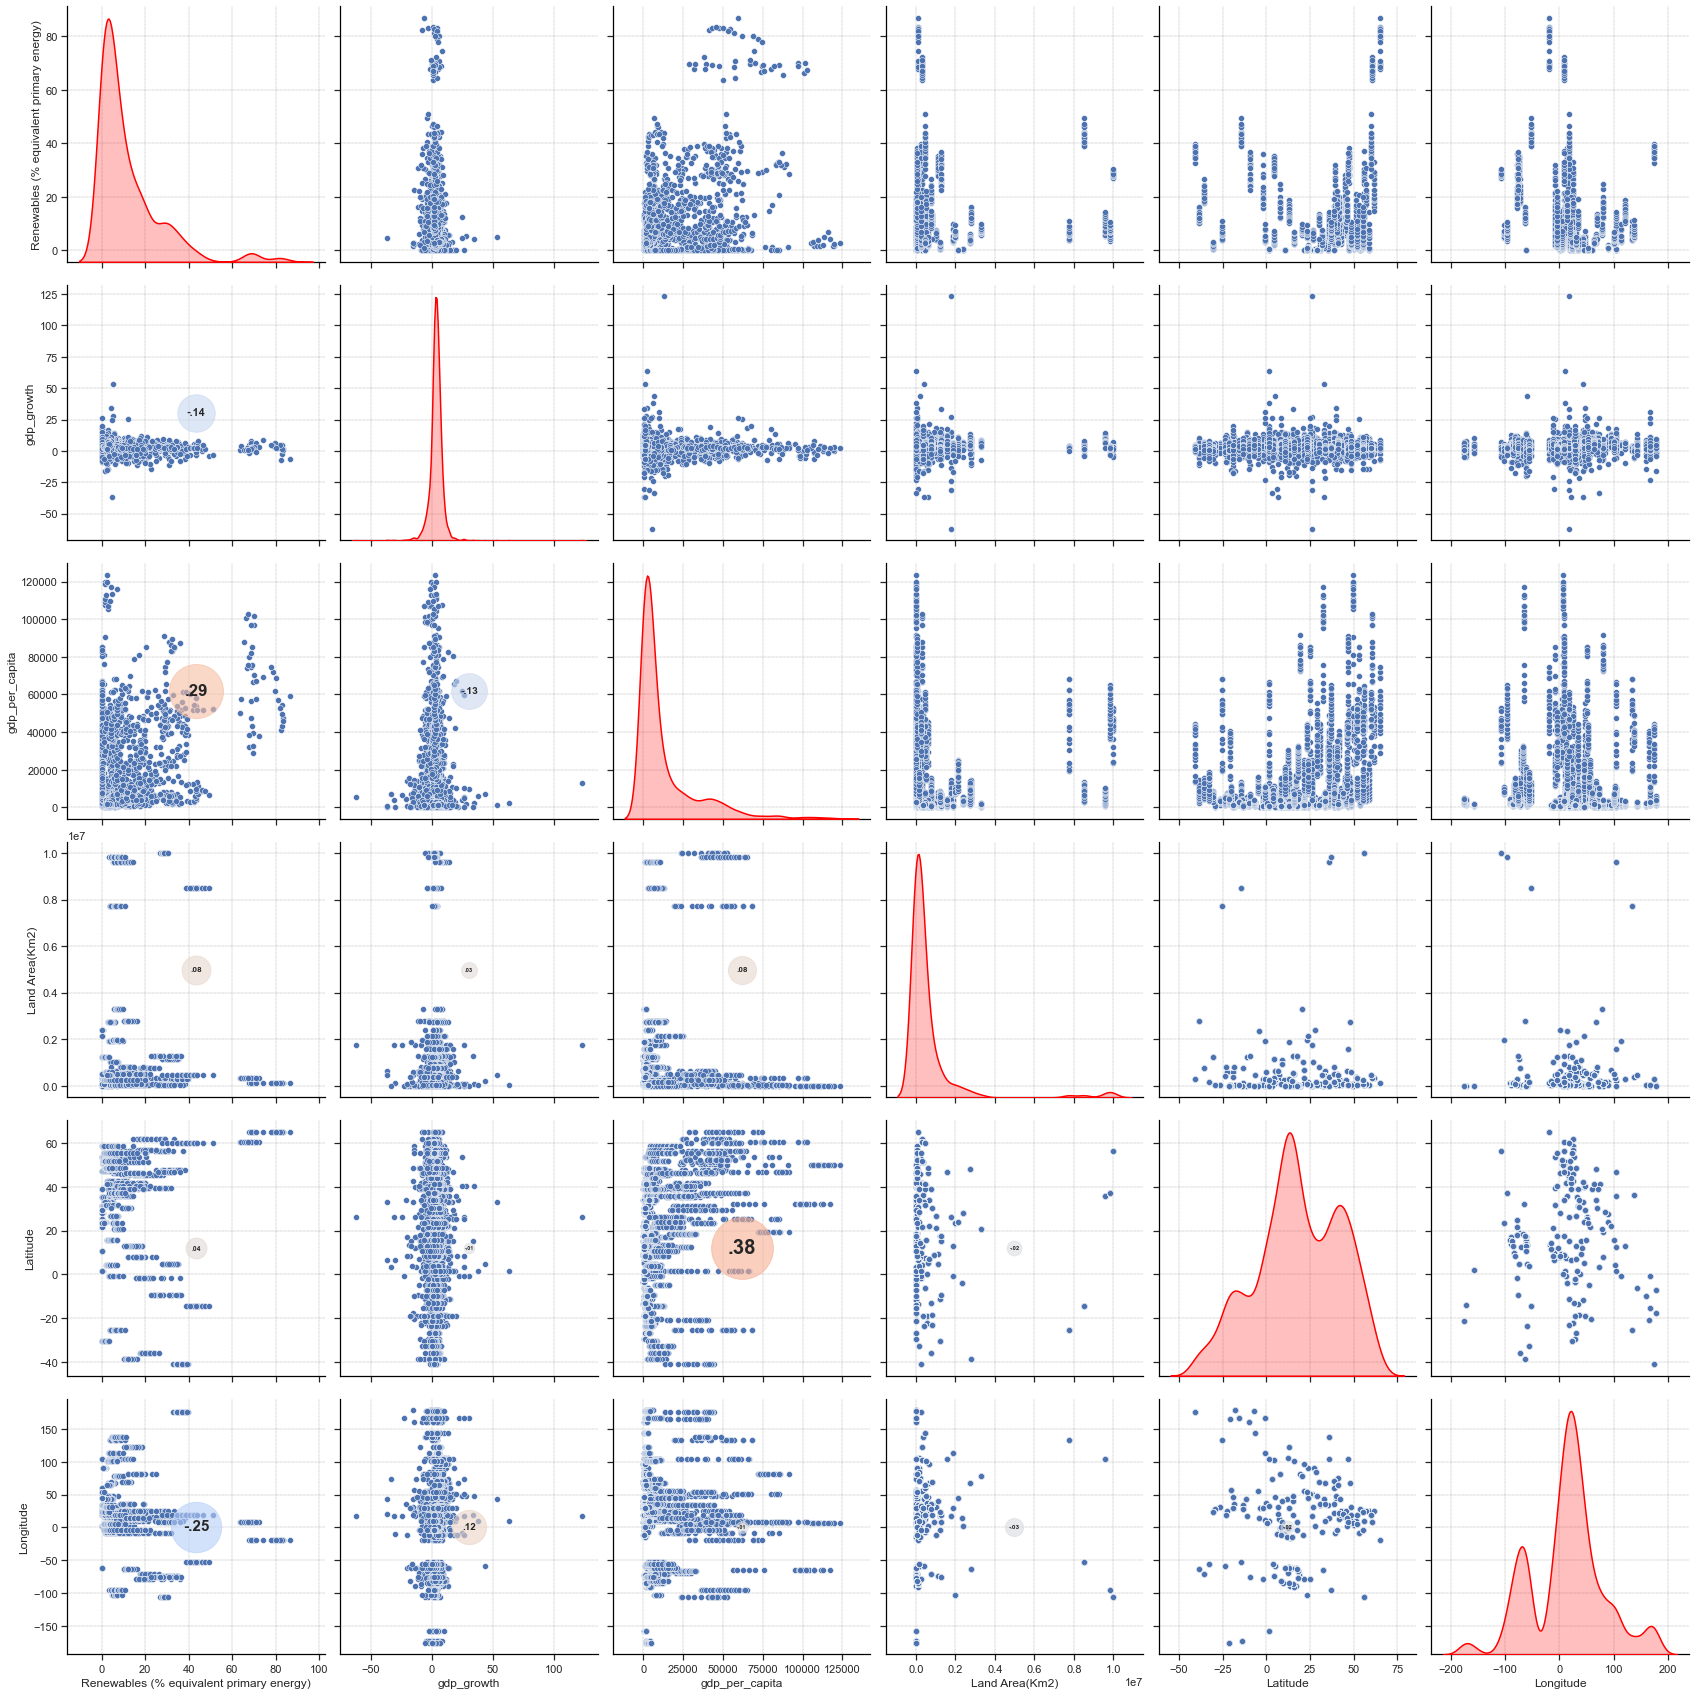

In [100]:
# Read the dataset
df = pd.read_csv("../data/global-data-on-sustainable-energy.csv")

# df = df1.loc[df1["Year"] == "2015"]

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size, fontweight="bold")

# Print dataset pairplot
a = sns.pairplot(df.iloc[:, 2:8], height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})
a.map_lower(corrdot)
#plt.savefig("../img/pairplot_a.png", dpi=200)

b = sns.pairplot(df.iloc[:, 8:14], height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})
b.map_lower(corrdot)
#plt.savefig("../img/pairplot_b.png", dpi=200)

c = sns.pairplot(df.iloc[:, 14:21], height=4, kind="scatter", diag_kind="kde", diag_kws={"linewidth": 1.5, "color": "red"})
c.map_lower(corrdot)
#plt.savefig("../img/pairplot_c.png", dpi=200)